## Contrast Enhancement:
The contrast is the difference in brightness between higher and lower intensity values in an image. A low contrast image's pixel values may hover around a certain value. Its histogram shows pixel value frequencies being higher at and around that number. As a result, it may have a washed out appearance and spotting the details may be difficult. Let's give an example:    

In [1]:
#Load the necessary libraries
import skimage.io
import matplotlib.pyplot as plt
from skimage import exposure

(-0.5, 719.5, 899.5, -0.5)

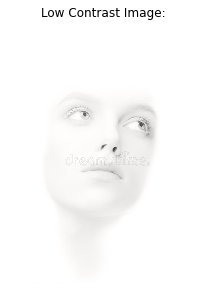

In [2]:
#Load and display the image
low_contrast = skimage.io.imread(fname='low_contrast_image.jpg')
skimage.io.imshow(low_contrast)
plt.title("Low Contrast Image: \n")
plt.axis('off')

Here we have a barely visible face image. Now let's create a histogram for this image:

Text(0, 0.5, 'Number of Pixels')

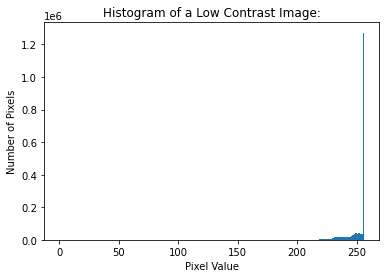

In [3]:
plt.hist(low_contrast.flatten(), bins=256, range=(0,256))
plt.title('Histogram of a Low Contrast Image:')
plt.xlabel('Pixel Value')
plt.ylabel('Number of Pixels')

The image colors are extremely light to the point where the features of the face are almost indistinguishable. As expected, the histogram shows a pile up at the lighter end of the intensity spectrum. 

We can enhance contrast through Histogram Equalization which spreads out the most frequent histogram intensity values using probability distribution. 

In general, there are two types of histogram equalization:
- The Standard Histogram Equalization
- The Adaptive also known as Contrast Limited Adaptive Histogram Equalization (CLAHE)

The Standard Histogram Equalization considers the global contrast of the image, so it gives rise to noise. The Adaptive Histogram Equalization, on the other hand, does equalization locally in small patches with high accuracy and less noise.   

### Standard Histogram Equalization:

To employ histogram equalizations, we will use exposure module from the skimage library. Let's apply Standard Histogram Equalization to our low-contrast image:

C:\Users\h\anaconda3\lib\site-packages\skimage\exposure\exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


Text(0.5, 1.0, 'Standard Histogram Equalization Applied Image')

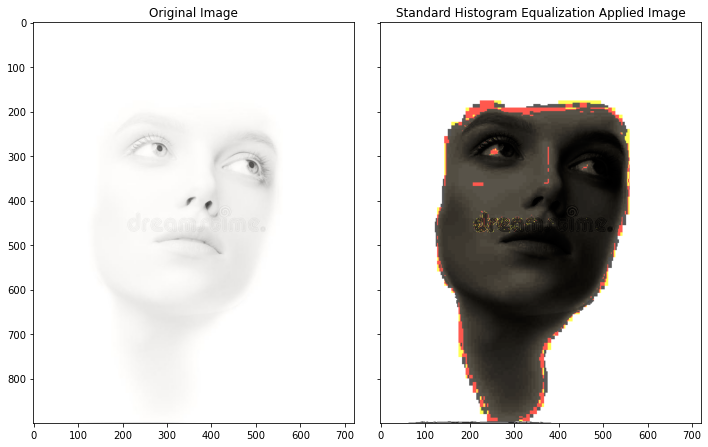

In [4]:
#Apply Standard Equalization to the original image:
eq_image = exposure.equalize_hist(low_contrast)
#Plot the original and the equalized image together for comparison.
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,8), sharex=True, sharey=True)
fig.tight_layout()
ax1.imshow(low_contrast, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax2.imshow(eq_image, cmap=plt.cm.gray)
ax2.set_title('Standard Histogram Equalization Applied Image')

With the equalized image, the face features are much more prominent. Also the watermark across the face is visible now. Unfortunately, there is a lot of noise and we do not have a natural looking image.

Let's plot the histogram of the equalized image:

Text(0, 0.5, 'Number of Pixels')

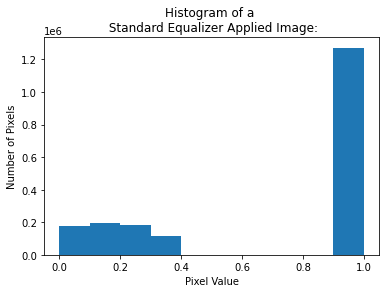

In [5]:
plt.hist(eq_image.flatten())
plt.title('Histogram of a \n Standard Equalizer Applied Image:')
plt.xlabel('Pixel Value')
plt.ylabel('Number of Pixels')

The histogram shows an accumulation on the lower (darker) intensity side of the graph. The bar on the value of 1 represents white background. 

### Adaptive Histogram Equalization:
Now let's use The Adaptive Histogram Equalization technique on the same image to see if it will actually mitigate the noise:

(-0.5, 719.5, 899.5, -0.5)

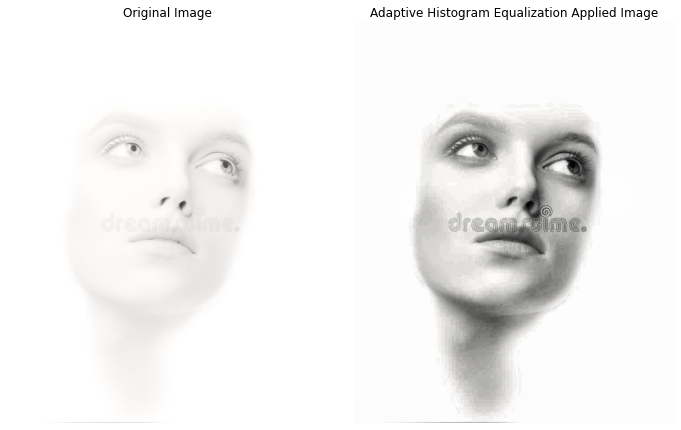

In [6]:
#Apply Adaptive Histogram Equalization to the low contrast image: 
image_adapt = exposure.equalize_adapthist(low_contrast, clip_limit=0.03)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
fig.tight_layout()
ax1.imshow(low_contrast, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.axis('off')
ax2.imshow(image_adapt, cmap=plt.cm.gray)
ax2.set_title('Adaptive Histogram Equalization Applied Image')
ax2.axis('off')

With the Adaptive Histogram Equalization technique, our image's details are still enhanced but we have a much more natural looking image. Let's plot the histogram of this equalized image.

Text(0, 0.5, 'Number of Pixels')

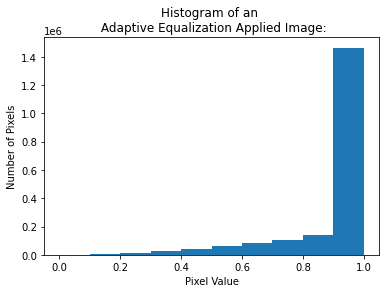

In [7]:
plt.hist(image_adapt.flatten())
plt.title('Histogram of an \n Adaptive Equalization Applied Image:')
plt.xlabel('Pixel Value')
plt.ylabel('Number of Pixels')

Adaptive Equalization applied image shows a more uniformly spread out histogram. 

## Exercise: Apply Histogram Equalization to a Covid Patient's X-Ray Image
Let's apply Histogram Equalization to this <a href= https://www.kaggle.com/bachrr/covid-chest-xray> chest X-ray image </a> of a Covid patient. We will try to make the details more significant of this faded image by applying standard and adaptive histogram equalizations.

(-0.5, 1609.5, 1631.5, -0.5)

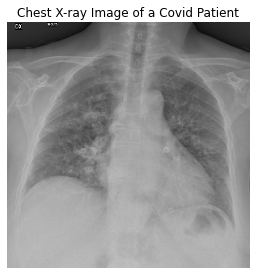

In [8]:
#Load chest x-ray image
x_ray = skimage.io.imread('chest_image.jpeg')
#Display the image
skimage.io.imshow(x_ray)
plt.title('Chest X-ray Image of a Covid Patient')
plt.axis('off')

Now let's write a function that will take an image, apply standard and adaptive histogram equalizations to the image and display the results along with the original image for comparison purposes:

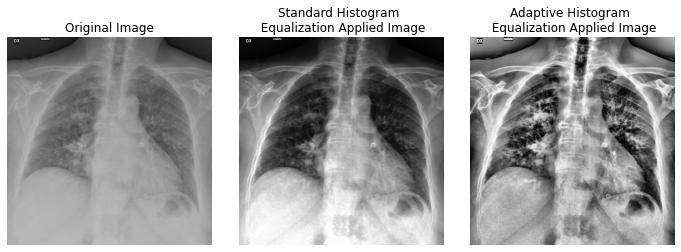

In [9]:
#Apply standard and adaptive histogram equalization to an image:
def equalize_image(image):
    '''
        This function takes in an image, applies standard and adaptive 
        histogram equalizations to it and presents the results along with
        the original image for comparison purposes.
    '''
    #Apply standard equalization
    eq_image = exposure.equalize_hist(image)
    #Apply adaptive histogram equalization
    image_adapt = exposure.equalize_adapthist(image, clip_limit=0.03)
    #Plot the original and the equalized images together for comparison purposes.
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(10,8), sharex=True, sharey=True)
    fig.tight_layout()
    ax1.imshow(image, cmap=plt.cm.gray)
    ax1.set_title('Original Image')
    ax1.axis('off')
    ax2.imshow(eq_image, cmap=plt.cm.gray)
    ax2.set_title('Standard Histogram \n Equalization Applied Image')
    ax2.axis('off') 
    ax3.imshow(image_adapt, cmap=plt.cm.gray)
    ax3.set_title('Adaptive Histogram \n Equalization Applied Image')
    ax3.axis('off') 
#Call the function with x-ray image:
equalize_image(x_ray)
    

From the images, we can infer that the Adaptive Histogram Equalization produces a clearer image. Although Standard Histogram Equalization renders an image with much sharper details than the original, the Adaptive Histogram Equalization makes the location and the intensity of the infection in the lungs much more evident. Even the little details like veins are much more visible with this technique.

In this section of the tutorial, we went over contrast enhancement and observed how equalization techniques can emphasize the details of the images.